# Notebook about the new method

The goal is to do the following steps for each frames :

1. Canye Edge Detection (Image Pre Processing)
2. Use math equation fo the boundary
3. Select good number of points to compute the equation
4. Trace the equation 
5. Sample the trace
6. Pixel track (dense flow) for the sampling
7. Ransac to fit the math equation 
8. Repeat from the 4rth step

## Canye Edge Detection (Image Pre Processing)

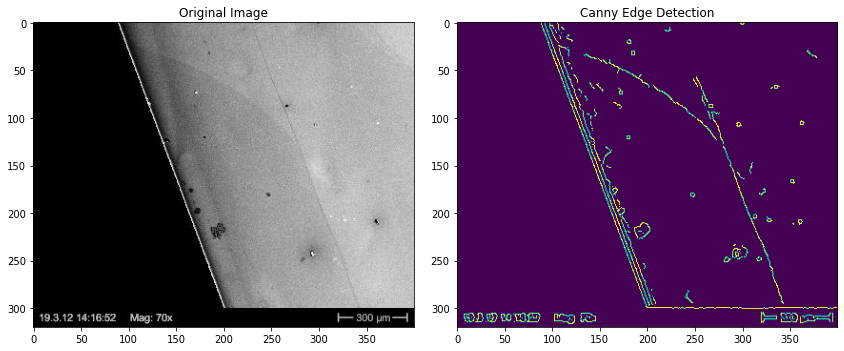

In [72]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

# Read Img
img = cv2.imread('1.jpg')

# Blur the img
gaussian = cv2.GaussianBlur(img, (7,7), 0)

edges_gaussian = cv2.Canny(gaussian, threshold1=20, threshold2=40)

fig, ax = plt.subplots(1, 2, figsize=(12,12))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(edges_gaussian)
ax[1].set_title('Canny Edge Detection')
plt.tight_layout(pad=1.7)

## Math Equation

The grain boundary equation is the following one:

$$
y(x) = \frac{a}{2\theta}\left(\theta - \frac{\pi}{2}\right) + \frac{a}{2\theta}\arccos{\left(\exp{\left(-\frac{2\theta}{a}x + \ln{(\sin{\theta)}}\right)}\right)} \quad \text{where} \quad y(\infty) = \frac{a}{2}~~\text{and}~~y'(0) = \tan{\theta}
$$

In [ ]:
import numpy as np

def y(x, a, theta):
    left_term = (a/(2*theta))*(theta - np.pi/2)
    arccos_term = np.arccos(np.exp(-(2*theta/a)*x + np.log(np.sin(theta))))
    right_term = (a/(2*theta))*arccos_term
    return left_term + right_term